Using this Kaggle data create a model to predict a house's value. We want to be able to understand what creates value in a house, as though we were a real estate developer.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from pandas import get_dummies
from pandas import concat
from sklearn import linear_model

In [2]:
housing = pd.read_csv("C:/Users/boyerm/Documents/Thinkful/Melbourne_housing_extra_data.csv")

In [3]:
housing.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,17407.000000,1.352500e+04,17407.000000,17407.000000,13625.000000,13625.000000,13625.000000,13603.000000,7323.000000,8429.000000,13737.000000,13737.000000,17407.000000
mean,2.934624,1.071537e+06,9.378962,3103.327742,2.887193,1.545688,1.566826,497.656546,149.330926,1961.673152,-37.812157,144.995283,7486.500603
std,0.983128,6.553000e+05,4.897268,76.005061,1.010500,0.716583,0.968356,1361.160059,145.204928,38.633785,0.068399,0.087676,4410.324671
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431620,389.000000
25%,2.000000,6.400000e+05,5.900000,3046.000000,2.000000,1.000000,1.000000,158.000000,92.000000,1930.000000,-37.856000,144.941200,4442.000000
50%,3.000000,8.910000e+05,9.200000,3101.000000,3.000000,1.000000,1.000000,385.000000,127.000000,1966.000000,-37.809400,145.000200,6567.000000
75%,4.000000,1.321000e+06,12.000000,3147.000000,3.000000,2.000000,2.000000,643.000000,179.000000,1998.000000,-37.763400,145.052250,10331.000000
max,12.000000,8.000000e+06,47.400000,3978.000000,30.000000,12.000000,26.000000,76000.000000,6791.000000,2106.000000,-37.414950,145.526350,21650.000000


In [4]:
housing.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067,...,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067,...,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,Northern Metropolitan,4019
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019


In [5]:
housing.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [6]:
housing.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode           int64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount      int64
dtype: object

In [7]:
myString = '4/03/2017'
print(myString[-4:])

2017


In [8]:
# remove NAs
housing = housing.dropna()#subset=['Price','Bedroom2','Bathroom','Car','Landsize','BuildingArea','Lattitude','Longtitude','Propertycount'])
housing.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,5382.000000,5.382000e+03,5382.000000,5382.000000,5382.000000,5382.000000,5382.000000,5382.000000,5382.000000,5382.000000,5382.000000,5382.000000,5382.000000
mean,2.913973,1.092466e+06,9.133538,3098.087142,2.880156,1.567447,1.555741,459.542549,141.274132,1962.313081,-37.807977,144.988653,7410.928094
std,0.972123,6.833749e+05,4.778432,73.236418,0.970452,0.712411,0.936050,890.947763,92.295223,38.839568,0.069046,0.087271,4334.100997
min,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.164920,144.551060,389.000000
25%,2.000000,6.350000e+05,5.900000,3043.250000,2.000000,1.000000,1.000000,145.000000,90.000000,1935.000000,-37.853445,144.929200,4407.000000
50%,3.000000,9.000000e+05,8.700000,3081.000000,3.000000,1.000000,1.000000,351.000000,122.000000,1966.000000,-37.802400,144.994705,6567.000000
75%,3.000000,1.351750e+06,11.800000,3146.000000,3.000000,2.000000,2.000000,618.750000,169.375000,1999.000000,-37.760100,145.049300,9594.000000
max,8.000000,8.000000e+06,47.400000,3977.000000,9.000000,8.000000,10.000000,37000.000000,3112.000000,2018.000000,-37.457090,145.526350,21650.000000


In [9]:

# create age at sale variable
housing['Year_sold'] = housing['Date'].str[-4:]
housing['Year_sold'] = pd.to_numeric(housing.Year_sold, errors='coerce')
housing['YearBuilt'] = pd.to_numeric(housing.YearBuilt, errors='coerce')

housing.head()
housing['HomeAge'] = housing['Year_sold'] - housing['YearBuilt']
housing.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode           int64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount      int64
Year_sold          int64
HomeAge          float64
dtype: object

In [10]:
housing.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Year_sold,HomeAge
count,5382.000000,5.382000e+03,5382.000000,5382.000000,5382.000000,5382.000000,5382.000000,5382.000000,5382.000000,5382.000000,5382.000000,5382.000000,5382.000000,5382.000000,5382.000000
mean,2.913973,1.092466e+06,9.133538,3098.087142,2.880156,1.567447,1.555741,459.542549,141.274132,1962.313081,-37.807977,144.988653,7410.928094,2016.352843,54.039762
std,0.972123,6.833749e+05,4.778432,73.236418,0.970452,0.712411,0.936050,890.947763,92.295223,38.839568,0.069046,0.087271,4334.100997,0.477899,38.810073
min,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.164920,144.551060,389.000000,2016.000000,-2.000000
25%,2.000000,6.350000e+05,5.900000,3043.250000,2.000000,1.000000,1.000000,145.000000,90.000000,1935.000000,-37.853445,144.929200,4407.000000,2016.000000,17.000000
50%,3.000000,9.000000e+05,8.700000,3081.000000,3.000000,1.000000,1.000000,351.000000,122.000000,1966.000000,-37.802400,144.994705,6567.000000,2016.000000,50.000000
75%,3.000000,1.351750e+06,11.800000,3146.000000,3.000000,2.000000,2.000000,618.750000,169.375000,1999.000000,-37.760100,145.049300,9594.000000,2017.000000,81.000000
max,8.000000,8.000000e+06,47.400000,3977.000000,9.000000,8.000000,10.000000,37000.000000,3112.000000,2018.000000,-37.457090,145.526350,21650.000000,2017.000000,821.000000


In [11]:
categories = ["Method", "Regionname","Type","CouncilArea"]
drop_list = ['Address','Lattitude', 'Longtitude','SellerG','Suburb','Date','YearBuilt']
housing = housing.drop(drop_list,1)
housingcats = get_dummies(housing[categories].fillna("Unknown"))

housing = concat([housing, housingcats],1)
housing = housing.drop(categories,1)



In [12]:
housing.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount,...,CouncilArea_Moonee Valley,CouncilArea_Moreland,CouncilArea_Nillumbik,CouncilArea_Port Phillip,CouncilArea_Stonnington,CouncilArea_Whitehorse,CouncilArea_Whittlesea,CouncilArea_Wyndham,CouncilArea_Yarra,CouncilArea_Yarra Ranges
2,2,1035000.0,2.5,3067,2.0,1.0,0.0,156.0,79.0,4019,...,0,0,0,0,0,0,0,0,1,0
4,3,1465000.0,2.5,3067,3.0,2.0,0.0,134.0,150.0,4019,...,0,0,0,0,0,0,0,0,1,0
6,4,1600000.0,2.5,3067,3.0,1.0,2.0,120.0,142.0,4019,...,0,0,0,0,0,0,0,0,1,0
11,3,1876000.0,2.5,3067,4.0,2.0,0.0,245.0,210.0,4019,...,0,0,0,0,0,0,0,0,1,0
14,2,1636000.0,2.5,3067,2.0,1.0,2.0,256.0,107.0,4019,...,0,0,0,0,0,0,0,0,1,0


In [13]:
housing.columns

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'Propertycount', 'Year_sold', 'HomeAge',
       'Method_PI', 'Method_S', 'Method_SA', 'Method_SP', 'Method_VB',
       'Regionname_Eastern Metropolitan', 'Regionname_Eastern Victoria',
       'Regionname_Northern Metropolitan', 'Regionname_Northern Victoria',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Western Victoria', 'Type_h', 'Type_t', 'Type_u',
       'CouncilArea_Banyule', 'CouncilArea_Bayside', 'CouncilArea_Boroondara',
       'CouncilArea_Brimbank', 'CouncilArea_Cardinia', 'CouncilArea_Casey',
       'CouncilArea_Darebin', 'CouncilArea_Frankston', 'CouncilArea_Glen Eira',
       'CouncilArea_Greater Dandenong', 'CouncilArea_Hobsons Bay',
       'CouncilArea_Hume', 'CouncilArea_Kingston', 'CouncilArea_Knox',
       'CouncilArea_Macedon Ranges', 'CouncilArea_Manningh

In [14]:
housing.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount,...,CouncilArea_Moonee Valley,CouncilArea_Moreland,CouncilArea_Nillumbik,CouncilArea_Port Phillip,CouncilArea_Stonnington,CouncilArea_Whitehorse,CouncilArea_Whittlesea,CouncilArea_Wyndham,CouncilArea_Yarra,CouncilArea_Yarra Ranges
count,5382.000000,5.382000e+03,5382.000000,5382.000000,5382.000000,5382.000000,5382.000000,5382.000000,5382.000000,5382.000000,...,5382.000000,5382.000000,5382.000000,5382.000000,5382.000000,5382.000000,5382.000000,5382.000000,5382.000000,5382.000000
mean,2.913973,1.092466e+06,9.133538,3098.087142,2.880156,1.567447,1.555741,459.542549,141.274132,7410.928094,...,0.086213,0.111854,0.001858,0.058343,0.055927,0.021182,0.007246,0.002787,0.059272,0.001115
std,0.972123,6.833749e+05,4.778432,73.236418,0.970452,0.712411,0.936050,890.947763,92.295223,4334.100997,...,0.280705,0.315216,0.043069,0.234412,0.229802,0.144003,0.084825,0.052724,0.236154,0.033374
min,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,389.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,6.350000e+05,5.900000,3043.250000,2.000000,1.000000,1.000000,145.000000,90.000000,4407.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,9.000000e+05,8.700000,3081.000000,3.000000,1.000000,1.000000,351.000000,122.000000,6567.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1.351750e+06,11.800000,3146.000000,3.000000,2.000000,2.000000,618.750000,169.375000,9594.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000e+06,47.400000,3977.000000,9.000000,8.000000,10.000000,37000.000000,3112.000000,21650.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
trainsize = int(housing.shape[0] / 2)
housing_train = housing.iloc[:trainsize, :].copy()
housing_test = housing.iloc[trainsize:, :].copy()

data_train = housing_train.drop('Price',1)
target_train = housing_train.Price

data_test = housing_test.drop('Price',1)
target_test = housing_test.Price

In [16]:
data_train.head()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount,Year_sold,...,CouncilArea_Moonee Valley,CouncilArea_Moreland,CouncilArea_Nillumbik,CouncilArea_Port Phillip,CouncilArea_Stonnington,CouncilArea_Whitehorse,CouncilArea_Whittlesea,CouncilArea_Wyndham,CouncilArea_Yarra,CouncilArea_Yarra Ranges
2,2,2.5,3067,2.0,1.0,0.0,156.0,79.0,4019,2016,...,0,0,0,0,0,0,0,0,1,0
4,3,2.5,3067,3.0,2.0,0.0,134.0,150.0,4019,2017,...,0,0,0,0,0,0,0,0,1,0
6,4,2.5,3067,3.0,1.0,2.0,120.0,142.0,4019,2016,...,0,0,0,0,0,0,0,0,1,0
11,3,2.5,3067,4.0,2.0,0.0,245.0,210.0,4019,2016,...,0,0,0,0,0,0,0,0,1,0
14,2,2.5,3067,2.0,1.0,2.0,256.0,107.0,4019,2016,...,0,0,0,0,0,0,0,0,1,0


## Linear Regression

In [17]:
regr = linear_model.LinearRegression()
regr.fit(data_train,target_train)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(data_train,target_train))


Coefficients: 
 [  1.44443052e+05  -4.14884468e+04  -1.42459740e+02   8.82080821e+03
   2.21153089e+05   7.70959260e+04   7.73869201e+01   9.77068044e+02
   1.94610652e+00   3.31906254e+04   2.59831588e+03  -2.71971264e+04
   9.58513707e+04  -9.33266666e+04   2.82570538e+04  -3.58463139e+03
   3.29705266e+05  -4.36557457e-11  -1.04580954e+05  -8.73114914e-11
  -1.06792537e+05   4.64524752e+04  -1.64784250e+05   5.82076609e-11
   1.87241730e+05  -2.39896389e+04  -1.63252091e+05  -4.26543923e+05
   4.73984122e+05   3.20411671e+05  -3.83657518e+05  -3.78349796e-10
  -1.60071068e-10   1.12805854e+05  -5.82076609e-11   7.05570046e+04
   3.49245965e-10  -5.70148063e+04   0.00000000e+00  -3.31750618e+04
   0.00000000e+00   0.00000000e+00  -3.09622638e+05  -1.76944398e+05
   0.00000000e+00  -2.56654065e+04   0.00000000e+00   4.92405991e+04
  -3.17276532e+04  -1.68086336e+05   0.00000000e+00   1.85918299e+05
   3.06317443e+05   3.02353926e+04   0.00000000e+00   0.00000000e+00
   6.29673556e+04

## SVM Regression

In [36]:
from sklearn.svm import SVR
import numpy as np
SVM_Regression = SVR(C=0.1, epsilon=0.1)
SVM_Regression.fit(data_train, target_train) 

SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [37]:
SVM_Regression.score(data_train, target_train) 

-0.081479773526408561

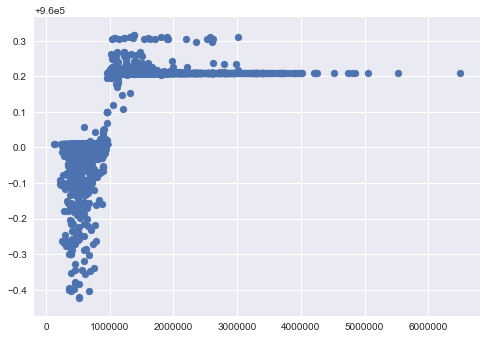

In [38]:
y_pred = SVM_Regression.predict(data_train)
plt.scatter(target_train,y_pred)
plt.show()

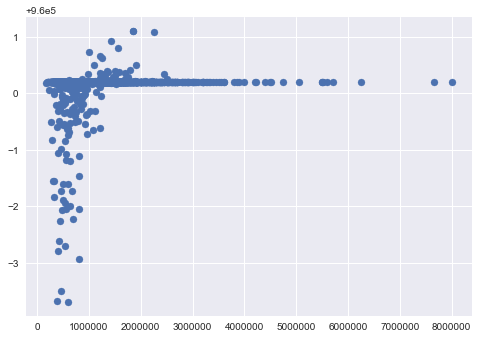

In [33]:
y_pred = SVM_Regression.predict(data_test)
plt.scatter(target_test,y_pred)
plt.show()

### SVM IS BAD

## Random Forest

In [26]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfr = ensemble.RandomForestRegressor()
rfr.fit(data_train, target_train)
cross_val_score(rfr, data_train, target_train, cv=5)

array([ 0.72875027,  0.72533774,  0.79355866,  0.76295558,  0.64554628])

In [27]:
rfr.score(data_train, target_train)

0.96185519421141497

In [31]:
rfr.score(data_test, target_test)

0.68534738994285194

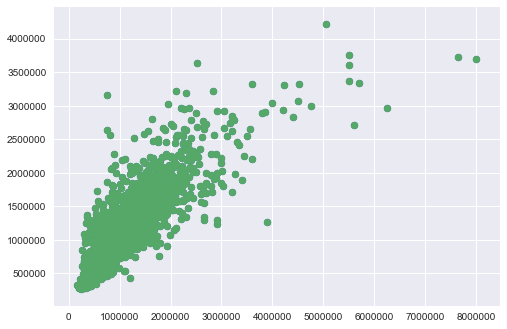

In [29]:
y_pred = rfr.predict(data_test)
plt.scatter(target_test,y_pred)
plt.show()

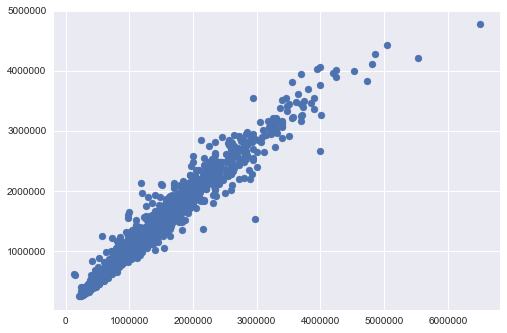

In [32]:
y_pred = rfr.predict(data_train)
plt.scatter(target_train,y_pred)
plt.show()

## LASSO

In [30]:
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(data_train, target_train)
print('R² for the model with few features:')
print(lass.score(data_train, target_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

R² for the model with few features:
0.724307153201

Parameter estimates for the model with few features:
[  1.44444213e+05  -4.14871133e+04  -1.41567244e+02   8.82024438e+03
   2.21153985e+05   7.70948159e+04   7.73872374e+01   9.77075731e+02
   1.94672382e+00   3.31883843e+04   2.59838024e+03  -6.09663562e+04
   6.20798977e+04  -1.26980251e+05  -5.51180364e+03  -3.73494223e+04
   3.94817061e+05   0.00000000e+00  -3.93130832e+04   0.00000000e+00
  -4.14268946e+04   1.11747946e+05  -9.96204681e+04   0.00000000e+00
   3.10505290e+05   9.92777803e+04  -3.99801150e+04  -4.42997083e+05
   4.57228157e+05   3.03725332e+05  -3.99966107e+05   0.00000000e+00
   0.00000000e+00   9.61819891e+04   0.00000000e+00   5.38157434e+04
   0.00000000e+00  -7.34653023e+04   0.00000000e+00  -4.99140436e+04
   0.00000000e+00   0.00000000e+00  -3.26101850e+05  -1.93398236e+05
   0.00000000e+00  -4.22538737e+04   0.00000000e+00   3.24990406e+04
  -4.82087414e+04  -1.84676852e+05   0.00000000e+00   1.69161322e+0

C:\Users\boyerm\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


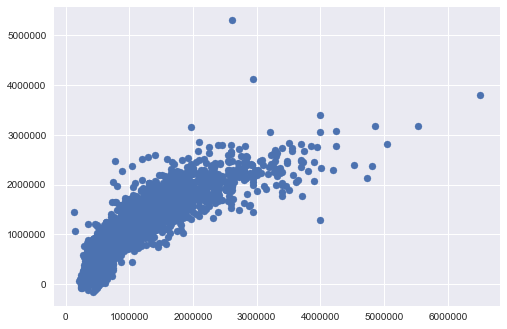

In [39]:
y_pred = lass.predict(data_train)
plt.scatter(target_train,y_pred)
plt.show()

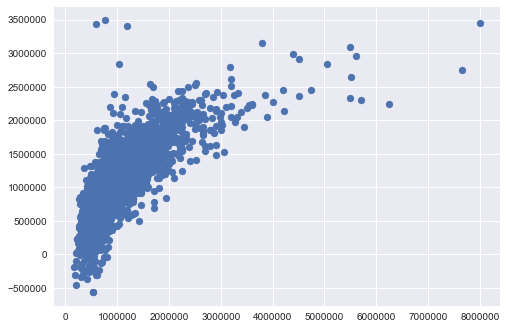

In [40]:
y_pred = lass.predict(data_test)
plt.scatter(target_test,y_pred)
plt.show()